In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


# Home Credit Default Risk

https://www.kaggle.com/c/home-credit-default-risk/overview

## Overview

### Description

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

많은 사람들이 신용 이력(credit histories)이 부족하거나 존재하지 않아 대출을 받기 위해 고군분투한다. 불행히도, 이 사람들은 종종 신뢰할 수 없는 대출 기관(untrustworthy lenders)에 의해 이용된다.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

Home Creditd은 긍정적이고 안전한 대출 경험(borrowing experience)을 제공함으로써 은행이 없는 사람들에게 재정적 포용(financial inclusion)을 확대하기 위해 노력한다. 이 소외된 사람들이 긍정적인 대출 경험을 갖도록하기 위해 Home Credit은 통신 및 거래 정보(telco and transactional information)를 포함한 다양한 대체 데이터를 사용하여 고객의 상환 능력을 예측한다.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

Home Credit은 현재 다양한 통계 및 기계 학습 방법을 사용하여 이러한 예측을 수행하고 있지만, Kagglers는 데이터의 잠재력을 최대한 활용하도록 도와야한다. 이렇게 하면 상환할 수 있는 고객이 거부되지 않고 고객이 성공할 수 있도록 원금, 만기 및 상환 일정(principal, maturity, and repayment calendar)과 함께 대출이 제공된다.

### Evaluation

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

Submissions은 예측 확률과 관촬된 target 사이의 ROC curve 아래 영역에서 평가된다.

참고: 

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

https://dsdoris.medium.com/roc-curve%EC%99%80-auc-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-126978d80a9e

https://m.blog.naver.com/PostView.nhn?blogId=sw4r&logNo=221015817276&proxyReferer=https:%2F%2Fwww.google.com%2F

ROC란?

1. ROC는 Receiver Operating Characteristic의 약자이다.

2. 신호탐지이론에서 적중확률(Y축, True Positive Rate, Sensitivity) 대 오경보확률(X축, False Positive Rate, 1-Specificity)의 그래프를 말한다고 한다.

3. ROC curve를 이해하려면 Confusion matrix를 알아야 한다.

Confusion Matrix

1. 학습을 통해서 모델이 얼마나 예측을 잘 하는지 평가하기 위해 Confusion matrix를 활용한다.

2. 예측값과 실제값을 비교해서 각 영역에 해당하는 비율이 어느 정도 되는지 보는 것이다.

![image](https://user-images.githubusercontent.com/59161837/112803989-d8be6e00-90ae-11eb-9bcf-c68562aa36eb.png)


1. True vs. False: 예측값이 실제 값인지에 대한 여부(맞췄으면 True, 틀렸으면 False)

2. Positive vs. Negative: 예측했던 값(양성/긍정/해당이면 Positive, 음성/부정/미해당이면 Negative)

TP: Positive로 예측, 실제 값은 Positive로 True(정답)

TN: Negative로 예측, 실제 값은 Negative로 True(정답)

FP: Positive로 예측, 실제 값은 Negative로 False(오답)

FN: Negative로 예측, 실제 값은 Positive로 False(오답)

![image](https://user-images.githubusercontent.com/59161837/112804080-ef64c500-90ae-11eb-850e-3ee9c2a09fde.png)


1. ROC curve의 x축은 False Positive Rate이다. 

2. 실제 값이 Negative인 것 중에서 모델이 Positive라고 잘 못 예측한 것의 비율이 된다.

3. FP / (FP + TN)

![image](https://user-images.githubusercontent.com/59161837/112804555-85005480-90af-11eb-80bc-85b5c71f8d1b.png)


1. ROC curve의 y축은 True Positive Rate이다.

2. 실제 값이 Positive인 것 중에서 모델이 Positive라고 맞게 예측한 것의 비율이 된다.

3. TP / (TP + FN)

![image](https://user-images.githubusercontent.com/59161837/112805354-749ca980-90b0-11eb-9795-6e366decb27a.png)


ROC curve 그리는 방법

1. 데이터를 모은다.

2. 실제 정답과 예측 확률을 알아본다. 예제에서는 모델이 Positive라고 추정한 확률이다.

3. 확률이 높은 순서대로 오름차순 나열을 해보자.

![image](https://user-images.githubusercontent.com/59161837/112805686-e248d580-90b0-11eb-82bf-4123feaae3c9.png)


1. 오름차순으로 정렬된 표의 맨 위에서부터 차례대로 아래로 가면서 실제 정답을 확인한다.

2. N이 나오면 오른쪽으로, P가 나오면 위로 올린다.

3. 그렇게 해서 그래프가 그려지고, 그려진 그래프의 아래쪽 부분의 면적을 합친 것을 AUC(Area Under the Curve)라고 부른다.

4. 이 면적이 넓을수록 모델의 정확도가 높다고 판단한다.

5. N,P에 따라 오른쪽으로, 위로 움직이는 크기를 정해주는 것이 Threshold이다.

![image](https://user-images.githubusercontent.com/59161837/112806322-9c404180-90b1-11eb-939f-20306cbbd878.png)


1. 기준(Threshold)을 0.7로 잡는다.

2. 표에서 예측 확률이 0.7 이상이면 P로 예측, 미만이면 N으로 예측한다.

3. x축(False Positive Rate)을 구해보면, 정답이 N인 것은 총 2개다. FP(False Positive)는 Threshold=0.7일 때, 1개다. 따라서 1/2이 된다.

4. y축(True Positive Rate)을 구해보면, 정답이 P인 것은 총 2개다. TP(True Positive)는 Threshold=0.7일 때, 0개다. 따라서 0/2이 된다.

5. ROC curve에 (1/2, 0) 이라는 점을 찍을 수 있다.

![image](https://user-images.githubusercontent.com/59161837/112807192-97c85880-90b2-11eb-8e3b-45511b988223.png)


![image](https://user-images.githubusercontent.com/59161837/112807296-b0d10980-90b2-11eb-8b8e-9f37742faad3.png)


1. 기준(Threshold)을 0.6으로 잡는다.

2. 표에서 예측 확률이 0.6 이상이면 P로 예측, 미만이면 N으로 예측한다.

3. x축(False Positive Rate)을 구해보면, 정답이 N인 것은 총 2개다. FP(False Positive)는 Threshold=0.6일 때, 1개다. 따라서 1/2이 된다.

4. y축(True Positive Rate)을 구해보면, 정답이 P인 것은 총 2개다. TP(True Positive)는 Threshold=0.6일 때, 1개다. 따라서 1/2이 된다.

5. ROC curve에 (1/2, 1/2) 이라는 점을 찍을 수 있다.

![image](https://user-images.githubusercontent.com/59161837/112807514-f55ca500-90b2-11eb-96d9-0afa3e953b2c.png)


![image](https://user-images.githubusercontent.com/59161837/112807585-0ad1cf00-90b3-11eb-8663-81f26b5f808f.png)


이러한 방법으로 Threshold를 계속적으로 낮추면서 모든 값들에 대한 거동을 살펴보면, 위와 같은 형태로 그래프가 그려진다.

https://nittaku.tistory.com/297

![image](https://user-images.githubusercontent.com/59161837/112828700-087b6f00-90cb-11eb-902b-2829bf573031.png)


![image](https://user-images.githubusercontent.com/59161837/112828925-51332800-90cb-11eb-887c-0eaf38226db7.png)


Accuracy

1. 정확도(Accuracy)는 전체 중에, 맞은 것(TP: Positive라고 예측했는데, 실제 Positive인 경우, TN: Negative라고 예측했는데, 실제 Negative인 경우)의 비율이다.

2. 따라서 정확도는 클래스별 분포가 같을 때만 이용 가능하다.

3. 정상환자의 정확도는 988/990 = 99.8%, 암환자의 정확도는 9/10 = 90%, 전체환자의 정확도는 997/1000 = 99.7%이다. 암환자의 정확도(90%)가 정확하게 반영되지 않고 있는걸 알 수 있다.

4. Accuracy의 단점을 보완하는 성능척도가 Precision과 Recall, ROC Curve와 AUC이다.

Precision

1. Precision = TP / (TP + FP)

2. 특정 클래스의 예측값(Positive)에 대해 실제 정답 값은 얼마나 있는지.

Recall

1. Recall = TP / (TP + FN)

2. 특정 실제값에 대해, 해당 예측값은 얼마나 맞췄는지.

https://darkpgmr.tistory.com/162

Precision, Recall의 이해

1. 이미지에서 사람을 자동으로 찾아주는 영상인식 기술이 있다 하자. 사람들에게 "이 기술의 검출율은 99.99% 입니다."라고 말하면 사람들은 감탄할 것이다. 반면에 "이 기술의 검출율은 50% 입니다."라고 말하면 사람들은 별 관심을 보이지 않을 것이다.

2. 문제를 조금 바꿔서, A와 B라는 기술이 있다. A라는 기술은 이미지에 있는 사람을 99.99% 잡아내지만 이미지 1장 당 평균 10건 정도의 오검출이 발생한다. 즉, 사람이 아닌 부분도 사람이라도 검출하는 경우가 빈번히 발생한다. 반면에 B라는 기술은 이미지에 있는 사람들 중 50% 밖에 못 잡아내지만 오검출은 거의 발생하지 않는다. 그러다면 A와 B 기술 중 어느 기술이 뛰어난 기술인가?

3. 인식 알고리즘의 성능과 관련한 오해는 어느 한 고정된 값으로 알고리즘의 성능을 평가하는 것이다. 예를 들어, '어느 알고리즘의 성능은 검출율(Recall) 0.9, 정확도(Precision) 0.7이다.' 라고 표현하는 식이다. 하지만 알고리즘의 성능을 어느 한 값으로만 표현하고 평가하는 것은 올바른 방법이 아니다. 왜냐하면 알고리즘의 Recall과 Precision은 알고리즘의 파라미터 조절에 따라 유동적으로 변하는 값이기 때문에 어느 한 값으로는 알고리즘 전체의 성능을 제대로 표현할 수 없기 때문이다.

4. 일반적으로 알고리즘의 검출율(recall)과 정확도(precision)는 서로 반비례 관계를 가진다. 알고리즘의 파라미터를 조절해 검출율을 높이면 오검출(False alarms)이 증가하고 반대로 오검출을 줄이기 위해 조건을 강화하면 검출율(recall)이 떨어진다.

Precision-recall 그래프

![image](https://user-images.githubusercontent.com/59161837/112831816-6dd15f00-90cf-11eb-9025-ff607e3e400b.png)


Average Precision (AP)

1. Precision-recall 그래프는 어떤 알고리즘의 성능을 전반적으로 파악하기에는 좋으나 서로 다른 두 알고리즘의 성능을 정량적으로(Quantitatively) 비교하기에는 불편한 점이 있다.

2. Average precision은 인식 알고리즘의 성능을 하나의 값으로 표현한 것으로서 precision-recall 그래프에서 그래프 선 아래쪽의 면적으로 계산된다.

3. Average precision이 높으면 높을수록 그 알고리즘의 성능이 전체적으로 우수하다는 의미이다. 

![image](https://user-images.githubusercontent.com/59161837/112832926-f3094380-90d0-11eb-80a8-e7adb678fc16.png)


## Baseline Code

### Imports

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


### Read in Data

In [3]:
# List files available

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


In [4]:
# Training data
app_train = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()


Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Testing data features
app_test = pd.read_csv('/kaggle/input/home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()


Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [6]:
app_train['TARGET'].value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

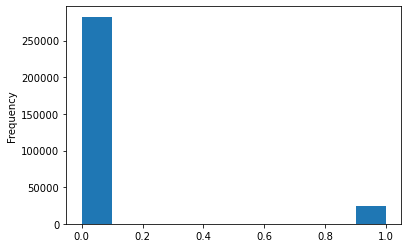

In [7]:
app_train['TARGET'].astype(int).plot.hist();


imbalanced claas problem

http://www.chioka.in/class-imbalance-problem/

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [9]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)


Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [10]:
# Number of each type of column
app_train.dtypes.value_counts()


float64    65
int64      41
object     16
dtype: int64

In [11]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)


3 columns were label encoded.


In [13]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)


Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [14]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)


Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [15]:
app_train['DAYS_BIRTH'].describe()


count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [16]:
"""
The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application.
To see these stats in years, we can multiple by -1 and divide by the number of days in a year:

DAYS_BIRTH column의 숫자는 현재 대출 신청(current loan application)과 관련하여 기록되기 때문에 음수다. 
이러한 통계를 연도 단위로 보려면 -1을 곱하고 일 년의 일수로 나눌 수 있다.
"""

(app_train['DAYS_BIRTH'] / -365).describe()


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [17]:
app_train['DAYS_EMPLOYED'].describe()


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

That doesn't look right! The maximum value (besides being positive) is about 1000 years!

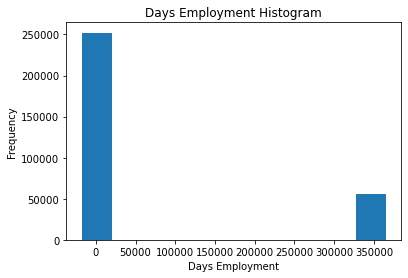

In [18]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');


Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.



In [19]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))


The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Well that is extremely interesting! It turns out that the anomalies have a lower rate of default.

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.



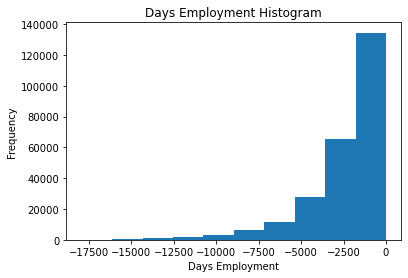

In [20]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');


The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). The other columns with DAYS in the dataframe look to be about what we expect with no obvious outliers.

As an extremely important note, anything we do to the training data we also have to do to the testing data. Let's make sure to create the new column and fill in the existing column with np.nan in the testing data.

In [21]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))


There are 9274 anomalies in the test data out of 48744 entries


In [22]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))


Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Let's take a look at some of more significant correlations: the DAYS_BIRTH is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1!) Looking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

In [23]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])


-0.07823930831003195

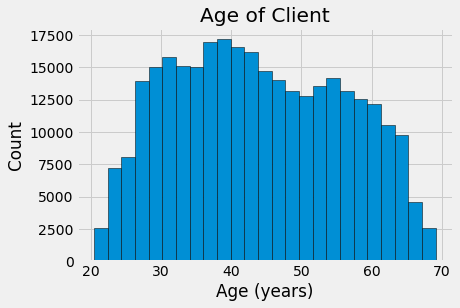

In [24]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');


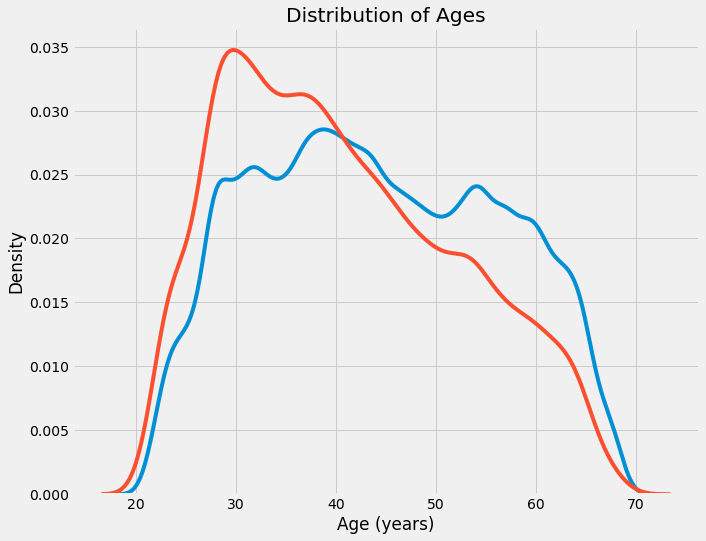

In [25]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
